In [1]:
from helpers import *
from gaussfit import *

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

## Configuration

In [2]:
# OLD LIST OF PMTS THAT WERE OFF FOR RUN-1 AND RUN-2
# list of PMTs at 0 voltage from HV files + disconnected pmts: 290
offPMTs = [1, 111, 143, 166, 192, 230, 238, 254, 222, 302, 309, 340, 353, 290 ]
offChs = PMTid_to_channel(offPMTs)
print("OLD OFFs: {}".format(offChs))

# NEW LIST OF PMTS THAT ARE OFF FOR RUN-3
offPMTs2 = [143, 254, 290 ]
offChs2 = PMTid_to_channel(offPMTs2)
print("CURRENT OFFs: {}".format(offChs2))

## PMTs that USED TO BE OFF AND HAVE BEEN SUCCESSFULLY RECOVERED
recoPMTs = [1, 166, 192, 230, 238, 222, 302 ]
recoChs = PMTid_to_channel(recoPMTs)

## PMTs that are ON but CANNOT BE EQUALIZED (>2000 V)
nochangePMTs = [ 111, 309, 340, 353 ]
nochangeChs = PMTid_to_channel(nochangePMTs)
print("NOT EQUALIZED: {}".format(nochangeChs))

## last drifting channels 
newPMTsWest = [ 66, 71 ]
newDriftChs = PMTid_to_channel(newPMTsWest)

WESTonly = [ x for x in range(1,181) ]
chWESTonly = PMTid_to_channel(WESTonly)

EASTonly = [ x for x in range(181,361) ]
chEASTonly = PMTid_to_channel(EASTonly)

nodisplay = offPMTs2 + nochangePMTs

OLD OFFs: [350, 248, 215, 190, 161, 139, 127, 103, 131, 59, 52, 21, 5, 71]
CURRENT OFFs: [215, 103, 71]
NOT EQUALIZED: [248, 52, 21, 5]


In [3]:
srcpath = "/exp/icarus/data/users/mvicenzi/pmt-calibration/calibrationdb/"
histpath = "/exp/icarus/data/users/mvicenzi/pmt-calibration/quick/"
figpath = "/exp/icarus/data/users/mvicenzi/pmt-calibration/figs/"

# equalization
#file = srcpath + "equalization_run10890_1697390445.csv" #nominal
#file = srcpath + "equalization_run10893_1697472021.csv" #+30V
#file = srcpath + "equalization_run10894_1697477246.csv" #-30V
#file = srcpath + "equalization_run10895_1697481155.csv" #-50V
#file = srcpath + "equalization_run10896_1697485836.csv" #-100V

#file = srcpath + "backgroundphotons_run11749_1709385772.csv"
#file = srcpath + "backgroundphotons_run11590_1708021616.csv"
#file = srcpath + "backgroundphotons_run11809_1710626100.csv"
#file = srcpath + "backgroundphotons_run11836_1711955795.csv"

#file = srcpath + "backgroundphotons_run9271_1671126767.csv"
#file = srcpath + "backgroundphotons_run9342_1672516694.csv"
#file = srcpath + "backgroundphotons_run9795_1682853193.csv"

#file = srcpath + "backgroundphotons_run12594_1728479508.csv"
#file = srcpath + "backgroundphotons_run12777_1730325159.csv"
#file = srcpath + "backgroundphotons_run12837_1731166338.csv"
#file = srcpath + "backgroundphotons_run12844_1731193962.csv"
#file = srcpath + "backgroundphotons_run12044_1720921793.csv"
#file = srcpath + "backgroundphotons_run10946_1698255258.csv"
#file = srcpath + "backgroundphotons_run10888_1697273285.csv"
#file = srcpath + "backgroundphotons_run10773_1696555198.csv"
#file = srcpath + "backgroundphotons_run13092_1742129575.csv"
#file = srcpath + "backgroundphotons_run13101_1742506896.csv"
#file = srcpath + "backgroundphotons_run10313_1692203948.csv"
#file = srcpath + "backgroundphotons_run8461_1654822767.csv"
#file = srcpath + "backgroundphotons_run13799_1761350422.csv"
#file = srcpath + "backgroundphotons_run13904_1764653191.csv"

file = getMostRecentCalibration(srcpath)

## PMT gain distribution

Loading data from: /exp/icarus/data/users/mvicenzi/pmt-calibration/calibrationdb/backgroundphotons_run14049_1771106596.csv


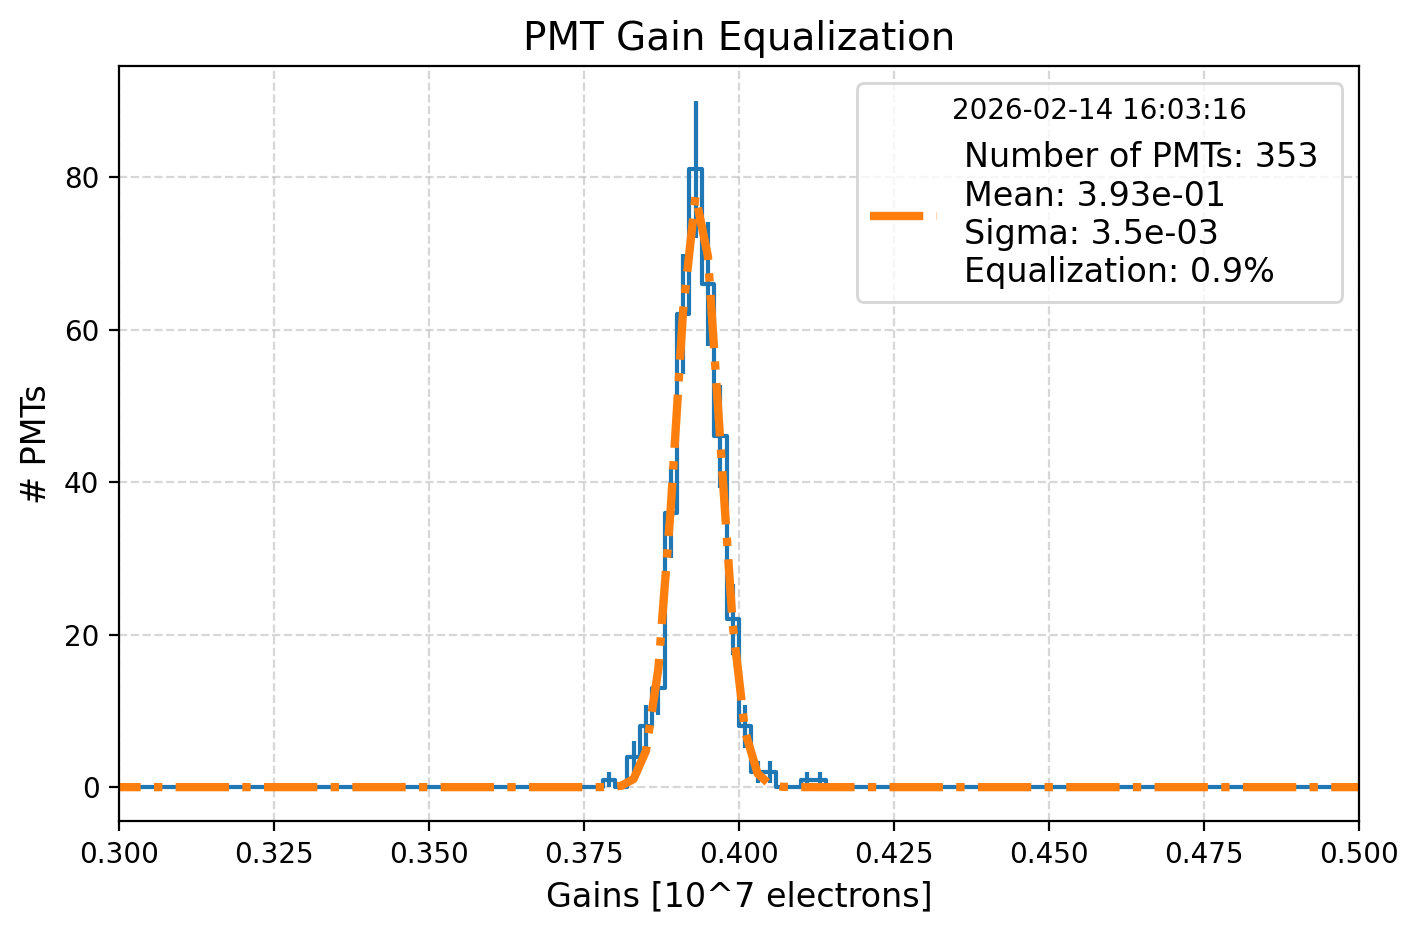

In [4]:
print( "Loading data from: "+ file )
run=getRun(file)
timestamp=getTimestamp(file)
data = getDataFrame(file, nodisplay, False)

fitOutput  = fitGainsDistribution( data, BINSIZE=0.002,RMIN=0.0,RMAX=1.0, p0=(0.4, 0.01) )

plt.figure(dpi=200)
plt.xlim((0.3, 0.5))
plt = makeplot(timestamp, figpath+"gain_hist_"+str(run)+".pdf", *fitOutput )
plt.title("PMT Gain Equalization", fontsize=14)
name = "run"+str(run)+"_histo_all.pdf"
plt.savefig(name, dpi=200)
plt.show()

## Scatter plots

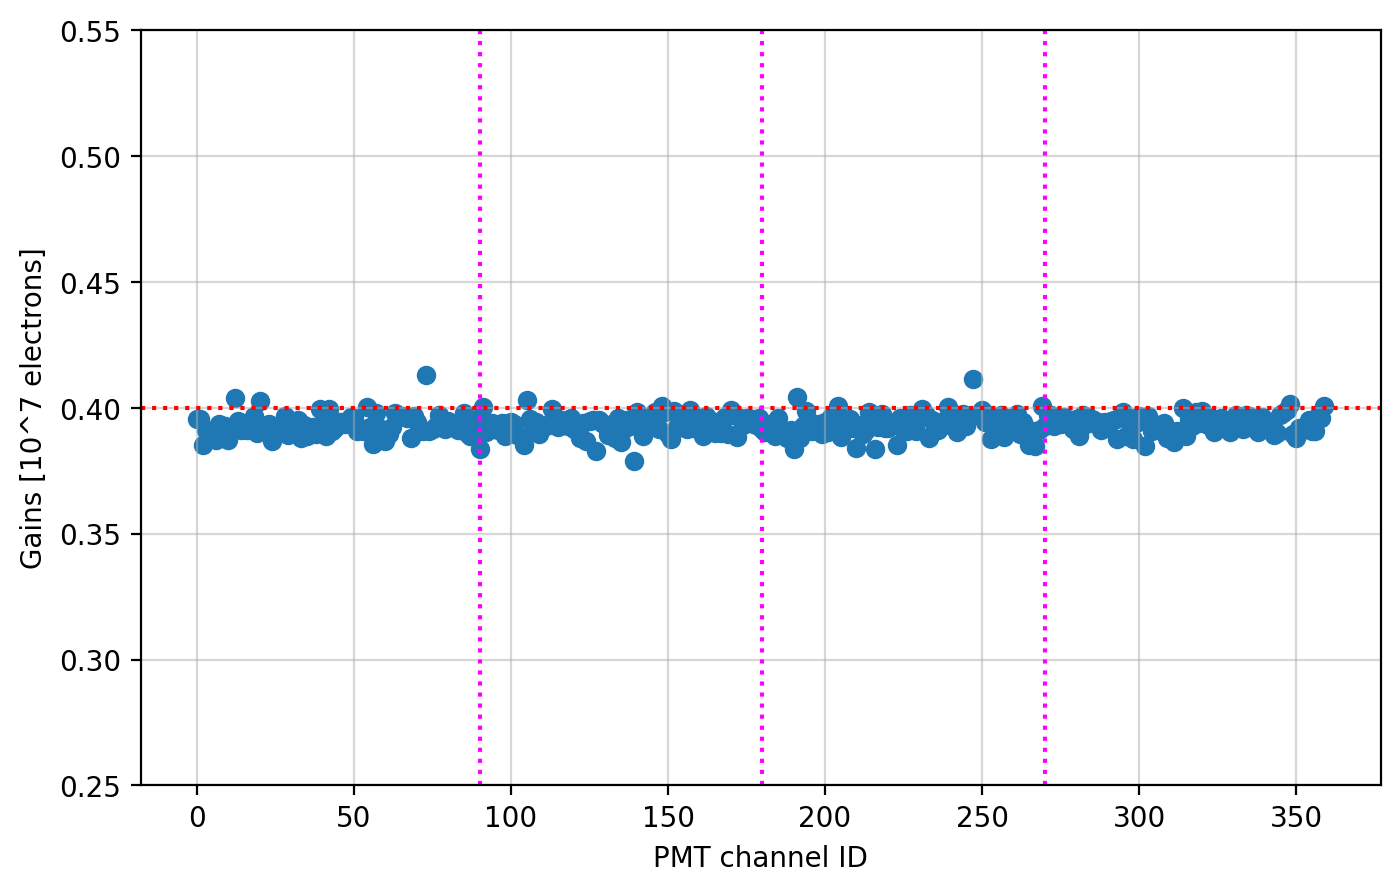

In [5]:
fig = plt.figure(dpi=200)

plt.scatter(data["pmt"],data["q"],marker="o")

## latest equalization target
plt.axhline(y=0.40, color="red", linestyle='dotted')

## KNOWN HV ISSUES
_selDrift = data['pmt'].isin(newDriftChs)
#plt.scatter(data[_selDrift]["pmt"],data[_selDrift]["q"],marker="x",color="C1", label="HV issues (West slot3)")
## RECOVERED FULLY
_selRecov = data['pmt'].isin(recoChs)
#plt.scatter(data[_selRecov]['pmt'],data[_selRecov]['q'],marker="x",color="magenta", label="Fully recovered")
# ON BUT NOT EQUALIZED
_selNoeq = data['pmt'].isin(nochangeChs)
#plt.scatter(data[_selNoeq]['pmt'],data[_selNoeq]['q'],marker="x",color="red", label="Not equalized")

plt.axvline(x=90,color="magenta",linestyle="dotted")
plt.axvline(x=180,color="magenta",linestyle="dotted")
plt.axvline(x=270,color="magenta",linestyle="dotted")

#plt.xlim((180,360))
plt.ylim((0.25,0.55))
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
#plt.legend()
plt.grid(alpha=0.5)

plt.savefig("run"+str(run)+"_scatter_all.pdf", dpi=200)
plt.show()


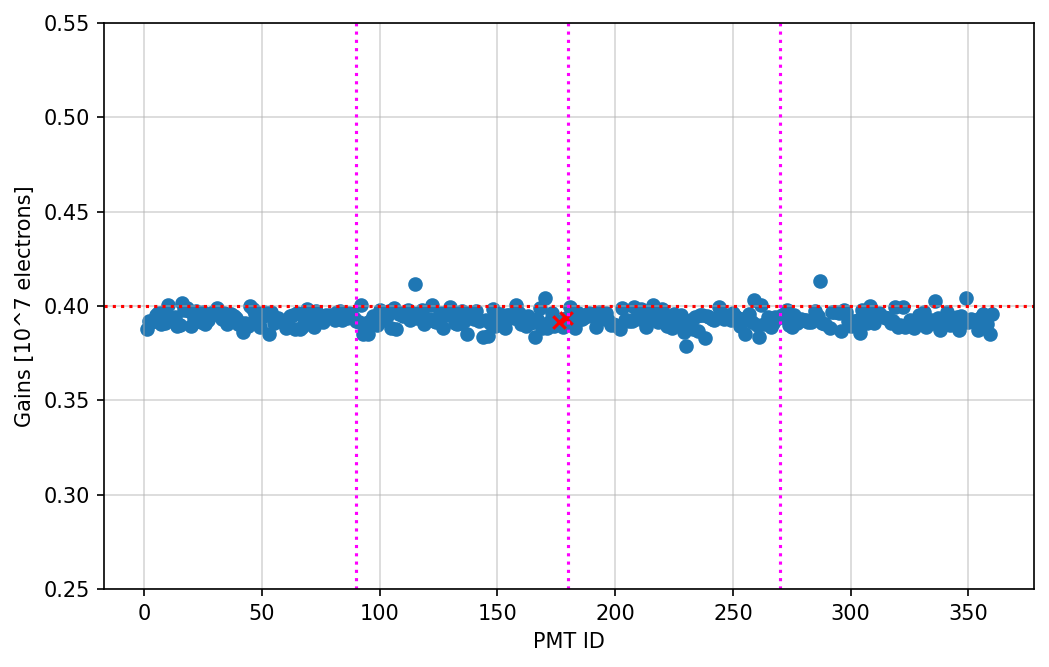

In [6]:
fig = plt.figure(dpi=150)

plt.scatter(data["id"],data["q"],marker="o")

## latest equalization target
plt.axhline(y=0.40, color="red", linestyle='dotted')

## KNOWN HV ISSUES
_selDrift = data['pmt'].isin(newDriftChs)
#plt.scatter(data[_selDrift]["id"],data[_selDrift]["q"],marker="x",color="C1", label="HV issues (West slot3)")
## RECOVERED FULLY
_selRecov = data['pmt'].isin(recoChs)
#plt.scatter(data[_selRecov]['id'],data[_selRecov]['q'],marker="x",color="magenta", label="Fully recovered")
# ON BUT NOT EQUALIZED
_selNoeq = data['pmt'].isin(nochangeChs)
#plt.scatter(data[_selNoeq]['id'],data[_selNoeq]['q'],marker="x",color="red", label="Not equalized")

plt.axvline(x=90,color="magenta",linestyle="dotted")
plt.axvline(x=180,color="magenta",linestyle="dotted")
plt.axvline(x=270,color="magenta",linestyle="dotted")

check = [176, 179]
_sel = data["id"].isin(check)
plt.scatter(data[_sel]["id"],data[_sel]["q"],marker="x",color="red")

#plt.xlim((180,360))
plt.ylim((0.25,0.55))
plt.xlabel("PMT ID")
plt.ylabel("Gains [10^7 electrons]")
#plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [7]:
## PRINTING OUTLIERS
reference = 0.40
low_bound = reference - 0.01
high_bound = reference + 0.01

_selHigh = data.q>high_bound
_selLow = data.q<low_bound


print("PMT channels above "+ str(high_bound))
print( data[_selHigh][["pmt","id","q"]] )

print("PMT channels below "+ str(low_bound))
print( data[_selLow][["pmt","id","q"]] )

PMT channels above 0.41000000000000003
     pmt   id         q
73    73  287  0.413109
247  247  115  0.411613
PMT channels below 0.39
     pmt   id         q
2      2  359  0.385377
6      6  354  0.387434
10    10  346  0.387339
24    24  338  0.387030
29    29  332  0.389093
..   ...  ...       ...
313  313   44  0.389601
315  315   49  0.388815
343  343   14  0.389241
349  349   20  0.389641
350  350    1  0.387929

[62 rows x 3 columns]


## Comparisons and random stuff

In [ ]:
file0 = srcpath + "backgroundphotons_run13642_1757980271.csv" #nominal
file1 = srcpath + "equalization_run13646_1758029202.csv" #-30V
file2 = srcpath + "equalization_run13648_1758033610.csv" #+20V
file3 = srcpath + "equalization_run13651_1758040465.csv" #+30V
file4 = srcpath + "equalization_run13653_1758047193.csv" #+50V

remove = offPMTs2 + nochangePMTs

#data_01 = getDataFrame(file01, remove, False)
data_0 = getDataFrame(file0, remove, False)
data_1 = getDataFrame(file1, remove, False)
data_2 = getDataFrame(file2, remove, False)
data_3 = getDataFrame(file3, remove, False)
data_4 = getDataFrame(file4, remove, False)

plt.figure(dpi=200)

#man_data_01 = data_01[data_01['pmt'].isin(manualChs)]
#man_data_0 = data_0[data_0['pmt'].isin(manualChs)]
#plt.scatter(man_data_01['pmt'],man_data_01['q'],marker="s", label="Start (10263)")
#plt.scatter(man_data_0['pmt'],man_data_0['q'],marker="s", label="Start (10313)")

#plt.scatter(data_01['pmt'],data_01['q'],marker="s", label="Start (10263)")
plt.scatter(data_0['id'],data_0['q'],marker="s", label="Nominal (13642)")
plt.scatter(data_1['id'],data_1['q'],marker="s", label="-30V (13646)")
plt.scatter(data_2['id'],data_2['q'],marker="s", label="+20V (13648)")
plt.scatter(data_3['id'],data_3['q'],marker="s", label="+30V (13651)")
plt.scatter(data_4['id'],data_4['q'],marker="s", label="+50V (13653)")

plt.axhline(y=0.4, color="red", linestyle='dotted')
plt.legend()
plt.xlabel("PMT ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()
#plt.xlim((0, 180))
plt.savefig("20250916_equalization_runs.pdf",dpi=200)

In [ ]:
plt.figure(dpi=200)

up=0.6
low=0.25
BINSIZE=0.002
nbins = int((up-low)/BINSIZE)

plt.hist(data_0['q'],range=(low,up), bins=nbins, histtype="step", lw=2, label="Nominal (13642)")
plt.hist(data_1['q'],range=(low,up), bins=nbins, histtype="step", lw=2, label="-30V (13646)")
plt.hist(data_2['q'],range=(low,up), bins=nbins, histtype="step", lw=2, label="+20V (13648)")
plt.hist(data_3['q'],range=(low,up), bins=nbins, histtype="step", lw=2, label="+30V (13651)")
plt.hist(data_4['q'],range=(low,up), bins=nbins, histtype="step", lw=2, label="+50V (13653)")

plt.axvline(x=0.4, color="red", linestyle='dotted')
plt.legend()
plt.xlabel("Gain [10^7 electrons]")
plt.ylabel("Number of PMTs")
plt.grid()
#plt.xlim((0, 180))
plt.savefig("20250916_equalization_runs_histos.pdf",dpi=200)